In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from scipy import stats
%matplotlib inline 

In [2]:
df = pd.read_csv('./house-prices-advanced-regression-techniques/test.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df2 = pd.read_csv('./house-prices-advanced-regression-techniques/sample_submission.csv')
df2.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [5]:
df['SalePrice'] = df2['SalePrice']

In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.052498
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.393989
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.683570
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.477511
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.079977


In [7]:
print(df2.shape)
print(df.shape)

(1459, 2)
(1459, 81)


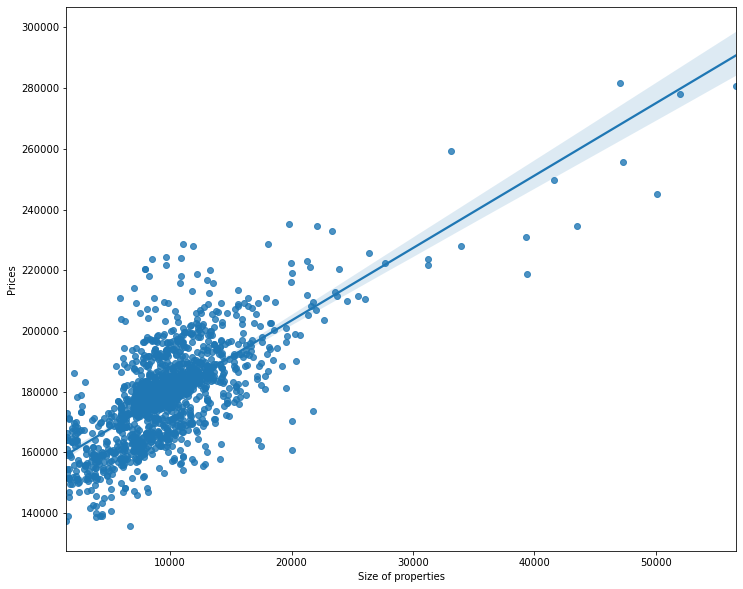

In [8]:
plt.figure(figsize=(12, 10))
sns.regplot(x='LotArea', y='SalePrice', data=df)

plt.ylabel('Prices')
plt.xlabel('Size of properties')
plt.show()

In [9]:
pearson_coef, p_value = stats.pearsonr(df['LotArea'], df['SalePrice'])

In [10]:
print('pearson_coef', pearson_coef)
print('p_value', p_value)

pearson_coef 0.7157953585160256
p_value 1.7517704795225613e-229


In [12]:
df[['LotArea', 'SalePrice']].corr()

,LotArea,SalePrice
LotArea,1.000000,0.715795
SalePrice,0.715795,1.000000


### Houses that have pools are more expensive?

In [13]:
df['PoolArea'].value_counts()

0      1453
144       1
228       1
368       1
444       1
561       1
800       1
Name: PoolArea, dtype: int64

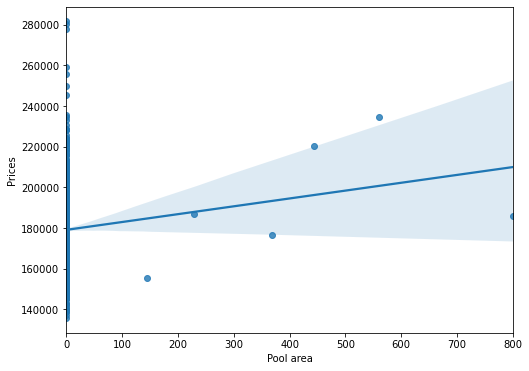

In [14]:
plt.figure(figsize=(8, 6))
sns.regplot(x='PoolArea', y='SalePrice', data=df)

plt.ylabel('Prices')
plt.xlabel('Pool area')
plt.show()

In [16]:
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.004993,0.009930,0.051492,-0.064887,0.009553,-0.058647,-0.079437,-0.021424,-0.045966,...,0.015664,-0.002045,0.020999,-0.025896,0.025566,0.049535,-0.005744,0.143358,-0.974884,0.126165
MSSubClass,0.004993,1.000000,-0.450505,-0.359537,0.034690,-0.071768,0.040848,0.046319,-0.012186,-0.058775,...,-0.022539,-0.025421,-0.029051,-0.029709,-0.071978,-0.017790,-0.045835,0.011366,-0.008392,-0.205917
LotFrontage,0.009930,-0.450505,1.000000,0.644608,0.182870,-0.092312,0.122356,0.092603,0.251533,0.204621,...,0.157426,0.179795,0.013340,-0.037487,0.113444,0.134232,0.068161,0.008810,-0.025263,0.501833
LotArea,0.051492,-0.359537,0.644608,1.000000,0.107989,-0.103402,0.048314,0.036907,0.188691,0.185470,...,0.158483,0.164815,0.099850,-0.001846,0.088712,0.140494,0.139071,0.005152,-0.051144,0.715795
OverallQual,-0.064887,0.034690,0.182870,0.107989,1.000000,-0.095874,0.621910,0.591267,0.453991,0.322583,...,0.270790,0.288367,-0.161339,0.002803,0.022334,-0.012330,0.033784,-0.008764,-0.012291,0.093643
OverallCond,0.009553,-0.071768,-0.092312,-0.103402,-0.095874,1.000000,-0.361027,0.021668,-0.144261,-0.054720,...,0.043058,-0.103783,0.072178,0.071285,0.033146,-0.037191,0.007236,-0.009767,0.015649,-0.083753
YearBuilt,-0.058647,0.040848,0.122356,0.048314,0.621910,-0.361027,1.000000,0.631696,0.312404,0.309595,...,0.233889,0.208040,-0.363012,-0.005442,-0.031984,-0.001060,0.007325,0.015599,-0.011006,0.008187
YearRemodAdd,-0.079437,0.046319,0.092603,0.036907,0.591267,0.021668,0.631696,1.000000,0.213937,0.175219,...,0.230724,0.258049,-0.243582,0.025823,-0.053761,-0.034862,0.003011,0.011771,0.029715,0.018889
MasVnrArea,-0.021424,-0.012186,0.251533,0.188691,0.453991,-0.144261,0.312404,0.213937,1.000000,0.343267,...,0.172721,0.163666,-0.112814,0.005772,0.069339,-0.005395,0.105723,0.005118,-0.029556,0.150002
BsmtFinSF1,-0.045966,-0.058775,0.204621,0.185470,0.322583,-0.054720,0.309595,0.175219,0.343267,1.000000,...,0.242369,0.136321,-0.097441,0.088241,0.131414,0.012089,0.165403,0.013397,0.030779,0.029932


### Most relevant data is:
LotArea <br>
BedroomAbvGr <br>
TotRmsAbvGrd <br>
LotFrontage <br>
GrLivArea


In [17]:
df[['LotArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'LotFrontage', 'GrLivArea', 'SalePrice']].corr()

,LotArea,BedroomAbvGr,TotRmsAbvGrd,LotFrontage,GrLivArea,SalePrice
LotArea,1.000000,0.181171,0.289576,0.644608,0.366324,0.715795
BedroomAbvGr,0.181171,1.000000,0.664498,0.205100,0.513831,0.786022
TotRmsAbvGrd,0.289576,0.664498,1.000000,0.344366,0.788012,0.625592
LotFrontage,0.644608,0.205100,0.344366,1.000000,0.357125,0.501833
GrLivArea,0.366324,0.513831,0.788012,0.357125,1.000000,0.566654
SalePrice,0.715795,0.786022,0.625592,0.501833,0.566654,1.000000


In [31]:
check_null = df[['LotArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'LotFrontage', 'GrLivArea', 'SalePrice']]
for item in check_null:
    print(check_null[item].isna().value_counts())

False    1459
Name: LotArea, dtype: int64
False    1459
Name: BedroomAbvGr, dtype: int64
False    1459
Name: TotRmsAbvGrd, dtype: int64
False    1232
True      227
Name: LotFrontage, dtype: int64
False    1459
Name: GrLivArea, dtype: int64
False    1459
Name: SalePrice, dtype: int64


In [36]:
df['LotFrontage'].value_counts(dropna=False)

NaN      227
60.0     133
80.0      68
70.0      63
50.0      60
        ... 
101.0      1
25.0       1
115.0      1
200.0      1
22.0       1
Name: LotFrontage, Length: 116, dtype: int64

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
model = LinearRegression()
df_model = df[['LotArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GrLivArea']]

In [39]:
model.fit(df_model, df['SalePrice'])

LinearRegression()

In [42]:
Y_hat = model.predict(df_model)

/Users/christian/opt/miniconda3/envs/studies/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/christian/opt/miniconda3/envs/studies/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


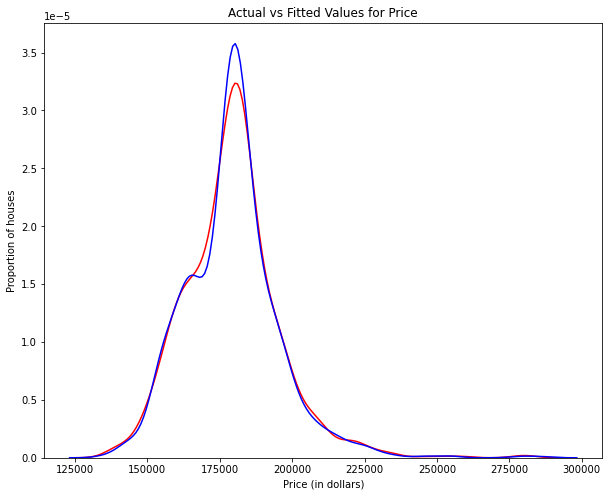

In [46]:
plt.figure(figsize=(10, 8))

ax1 = sns.distplot(df['SalePrice'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of houses')

plt.show()
plt.close()